In [1]:
import json
import requests
from pprint import pprint
import pandas as pd


## Import raw data and convert to merged data 

In [2]:
filepath_crime = "atlcrime.csv"
filepath_weather = "weather_atl_2016.csv"
Crime_DF = pd.read_csv(filepath_crime, encoding="utf-8")
Weather_DF = pd.read_csv(filepath_weather, encoding="utf-8")


/var/folders/7t/0gtlmn8s5cv7hcm0bl20pb4h0000gn/T/ipykernel_14809/1494093554.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  Crime_DF = pd.read_csv(filepath_crime, encoding="utf-8")


In [3]:
Cleaned_Crime_DF = Crime_DF.drop(['Unnamed: 0','location', 'number', 'beat', 'npu'], axis =1)

In [4]:
Cleaned_Weather_DF = Weather_DF.drop(['feelslikemax','feelslikemin', 'feelslike', 'dew', 'humidity', 'precipprob',
                                 'precipcover', 'preciptype', 'windgust', 'windspeed', 'winddir',
                                 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
                                 'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'sunset',
                                 'conditions', 'description', 'icon', 'stations'], axis =1)

In [5]:
Cleaned_Crime_DF['date'] = Cleaned_Crime_DF['date'].astype('datetime64[ns]')
Cleaned_Weather_DF['datetime'] = Cleaned_Weather_DF['datetime'].astype('datetime64[ns]')
Cleaned_Crime_DF = Cleaned_Crime_DF.rename(columns = {'date':'datetime'})


In [6]:
Merged_DF = pd.merge(Cleaned_Weather_DF, Cleaned_Crime_DF, on = 'datetime')

In [7]:
Merged_DF.head()

,name,datetime,tempmax,tempmin,temp,precip,snow,snowdepth,moonphase,crime,neighborhood,lat,long
0,atlanta,2016-01-01,45.9,39.6,42.8,0.0,0.0,0.0,0.72,AUTO THEFT,Sweet Auburn,33.75383,-84.37220
1,atlanta,2016-01-01,45.9,39.6,42.8,0.0,0.0,0.0,0.72,LARCENY-FROM VEHICLE,Downtown,33.77119,-84.38476
2,atlanta,2016-01-01,45.9,39.6,42.8,0.0,0.0,0.0,0.72,LARCENY-FROM VEHICLE,Midtown,33.77425,-84.38922
3,atlanta,2016-01-01,45.9,39.6,42.8,0.0,0.0,0.0,0.72,ROBBERY-PEDESTRIAN,Castleberry Hill,33.74520,-84.40406
4,atlanta,2016-01-01,45.9,39.6,42.8,0.0,0.0,0.0,0.72,AGG ASSAULT,Adamsville,33.75771,-84.50344


## Temperature vs. Crime DataFrame 

In [8]:
# Create bin in which to place values based upon temperature range
# max = 87.4
# min = 28.2

bins = [20,30,40,50,60,70,80,90]
labels = ["20F - 30F", "31F - 40F","41F - 50F","51F - 60F","61F - 70F","71F - 80F","81F - 90F"]
Merged_DF['Temp Range'] = pd.cut(Merged_DF['temp'], bins, labels=labels)

In [9]:
Crime_Temp_Range = Merged_DF.groupby(["Temp Range"]).count()['crime']
# Crime_Temp_Range = NewDF['crime'].count()
# Crime_Temp_Range
Temp_yaxis = []
for count in Crime_Temp_Range:
    Temp_yaxis.append(count)
print(Temp_yaxis)

[204, 1772, 3636, 4738, 5967, 7336, 5478]


## Moon Phase vs. Crime DataFrame

In [10]:
New_Moon = Merged_DF.loc[Merged_DF['moonphase'] == 0, :]
Waxing_Crescent = Merged_DF.loc[(Merged_DF['moonphase'] < 0.25) & (Merged_DF['moonphase'] > 0) , :]
First_Quarter = Merged_DF.loc[(Merged_DF['moonphase'] == 0.25) , :]
Waxing_Gibbous= Merged_DF.loc[(Merged_DF['moonphase'] < 0.5) & (Merged_DF['moonphase'] > 0.25) , :]
Full_Moon = Merged_DF.loc[Merged_DF['moonphase'] == 0.5, :]
Waning_Gibbous= Merged_DF.loc[(Merged_DF['moonphase'] < 0.75) & (Merged_DF['moonphase'] > 0.5) , :]
Third_Quarter = Merged_DF.loc[Merged_DF['moonphase'] == 0.75,:]
Waning_Crescent = Merged_DF.loc[(Merged_DF['moonphase'] <= 1) & (Merged_DF['moonphase'] > 0.75) , :]


In [11]:
Moon_Phase_DF = pd.DataFrame({
    'New Moon' : New_Moon.groupby('crime').count()['name'],
    'Waxing Crescent' : Waxing_Crescent.groupby('crime').count()['name'],
    'First Quarter' : First_Quarter.groupby('crime').count()['name'],
    'Waxing Gibbous' : Waxing_Gibbous.groupby('crime').count()['name'],
    'Full Moon' : Full_Moon.groupby('crime').count()['name'],
    'Waning Gibbous' : Waning_Gibbous.groupby('crime').count()['name'],
    'Third Quarter' : Third_Quarter.groupby('crime').count()['name'],
    'Waning Crescent' : Waning_Crescent.groupby('crime').count()['name'],
})

In [12]:
# Convert NAN to 0???
New_Moon_Phase_Cleaned = Moon_Phase_DF.fillna(0)
New_Moon_Phase_Cleaned['First Quarter'] = New_Moon_Phase_Cleaned['First Quarter'].astype('int')
New_Moon_Phase_Cleaned['Third Quarter'] = New_Moon_Phase_Cleaned['Third Quarter'].astype('int')


In [13]:
### NUMBER OF DAYS IN EACH MOONPHASE
New_Moon_days = len(New_Moon['datetime'].unique())
Waxing_Crescent_days = len(Waxing_Crescent['datetime'].unique())
First_Quarter_days = len(First_Quarter['datetime'].unique())
Waxing_Gibbous_days = len(Waxing_Gibbous['datetime'].unique())
Full_Moon_days = len(Full_Moon['datetime'].unique())
Waning_Gibbous_days = len(Waning_Gibbous['datetime'].unique())
Third_Quarter = len(Third_Quarter['datetime'].unique())
Waning_Crescent_days = len(Waning_Crescent['datetime'].unique())

phase_list = [New_Moon_days, Waxing_Crescent_days, First_Quarter_days, Waxing_Gibbous_days, Full_Moon_days,  
             Waning_Gibbous_days, Third_Quarter, Waning_Crescent_days]

# Phase_days = pd.DataFrame({
#     'New_Moon_days' : New_Moon_days,
#     'Waxing_Crescent_days' : Waxing_Crescent_days,
#     'First_Quarter_days' : First_Quarter_days,
#     'Waxing_Gibbous_days' : Waxing_Gibbous_days,
#     'Full_Moon_days' : Full_Moon_days,
#     'Waning_Gibbous_days' : Waning_Gibbous_days,
#     'Third_Quarter' : Third_Quarter,
#     'Waning_Crescent_days' : Waning_Crescent_days}, index = [0]
#     )
phase_list

[12, 79, 1, 78, 21, 78, 2, 95]

## Precipitation Vs. Crime DataFrame

In [14]:
# Create bin in which to place values based upon precipitation range
# max = 2.0
# min = 0

rain_bins = [-1, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]
rain_labels = ["0 ~ 0.19 in","0.2 ~ 0.39 in","0.4 ~ 0.59 in","0.6 ~ 0.79 in","0.8 ~ 0.99 in","1 ~ 1.19 in",
              "1.2 - 1.39 in","1.4 ~ 1.59 in","1.6 ~ 1.79 in","1.8 ~ 2 in"]
Merged_DF['Precip_Range'] = pd.cut(Merged_DF['precip'], rain_bins, labels=rain_labels)


In [15]:

RainDF = Merged_DF.groupby(["Precip_Range","crime"])
Crime_Rain_Range = RainDF['crime'].count()
print(Crime_Rain_Range)


Precip_Range  crime              
0 ~ 0.19 in   AGG ASSAULT            1932
              AUTO THEFT             3417
              BURGLARY-NONRES         862
              BURGLARY-RESIDENCE     3014
              HOMICIDE                 94
                                     ... 
1.8 ~ 2 in    LARCENY-NON VEHICLE      66
              RAPE                      2
              ROBBERY-COMMERCIAL        0
              ROBBERY-PEDESTRIAN       14
              ROBBERY-RESIDENCE         2
Name: crime, Length: 110, dtype: int64


## Neighborhood vs. Crime DataFrame

In [16]:
# Downtown                1846
# Midtown                 1311
# Old Fourth Ward          789
# West End                 682
# Vine City                602

Neighbor_DF = Merged_DF.loc[Merged_DF['neighborhood'].isin(['Downtown','Midtown','Old Fourth Ward','West End','Vine City'])]
Cleaned_Neighbor = Neighbor_DF.groupby(['neighborhood', 'Temp Range'])
More_Cleaned_Neighbor = Cleaned_Neighbor['crime'].count()
print(More_Cleaned_Neighbor)

neighborhood     Temp Range
Downtown         20F - 30F      11
                 31F - 40F      95
                 41F - 50F     257
                 51F - 60F     283
                 61F - 70F     395
                 71F - 80F     463
                 81F - 90F     342
Midtown          20F - 30F      11
                 31F - 40F      94
                 41F - 50F     183
                 51F - 60F     221
                 61F - 70F     297
                 71F - 80F     300
                 81F - 90F     205
Old Fourth Ward  20F - 30F       2
                 31F - 40F      46
                 41F - 50F      99
                 51F - 60F     136
                 61F - 70F     168
                 71F - 80F     202
                 81F - 90F     136
Vine City        20F - 30F       5
                 31F - 40F      32
                 41F - 50F      81
                 51F - 60F     102
                 61F - 70F     120
                 71F - 80F     143
                 81F - 90F 

## Plotting Temp vs. Crime ( WHAT PLOT?) 

In [17]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy import stats
import sklearn.datasets as dta

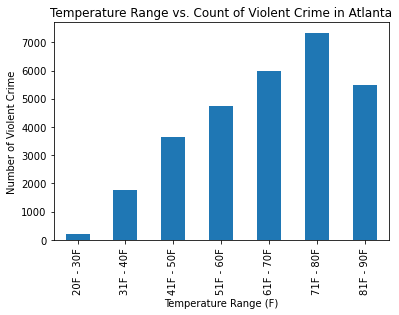

<Figure size 432x288 with 0 Axes>

In [18]:
#Crime_Temp_Range (Original DataFrame)

# xAxis = np.arange(len(bins))
# tickLocations = []
# for x in xAxis:
#     tickLocations.append(x)
# plt.bar(xAxis, Temp_yaxis, facecolor='b', align ='center')
# plt.xticks(tickLocations, bins)
# plt.show()

Temp_chart = Crime_Temp_Range.plot(kind = 'bar')
Temp_chart.set_xlabel('Temperature Range (F)')
Temp_chart.set_ylabel('Number of Violent Crime')
Temp_chart.set_title('Temperature Range vs. Count of Violent Crime in Atlanta')

plt.savefig("Temperature Range and Count of Crime.png",
            bbox_inches ="tight")
plt.show()
plt.tight_layout()

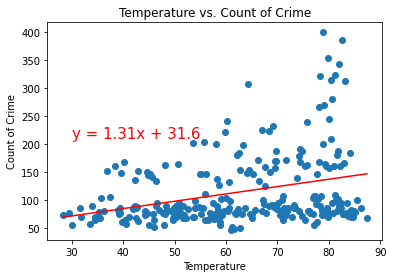

R value is 0.09711317319148892.
The correlation coefficient between precipitation and crime rate is 0.31


In [19]:
Temp_2 = Merged_DF.groupby(['temp']).count()['crime']


xAxis_temperature = Merged_DF['temp'].unique()
Output = sorted(xAxis_temperature, key = float)
Output_array = np.array(Output, dtype=np.float64)

plt.scatter(Output, Temp_2)

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(Output, Temp_2)
crime_temp_fit = (slope * Output_array) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(Output, crime_temp_fit, "r-")
plt.annotate(line_eq,(30, 210),fontsize=15,color="red")
plt.xlabel('Temperature')
plt.ylabel('Count of Crime')
plt.title('Temperature vs. Count of Crime')
plt.savefig("Temperature Range and Count of Crime (scatter plot).png",
            bbox_inches ="tight")
plt.show()

print(f"R value is {rvalue**2}.")
print(f"The correlation coefficient between precipitation and crime rate is {round(st.pearsonr(Output_array, Temp_2)[0],2)}")


## Plotting Moonphase vs. Crime 

In [20]:
# New_Moon_Phase_Cleaned
New_Moon_Phase_Cleaned.head(20)

,New Moon,Waxing Crescent,First Quarter,Waxing Gibbous,Full Moon,Waning Gibbous,Third Quarter,Waning Crescent
crime,,,,,,,,
AGG ASSAULT,60,534,6,436,114,487,4,529
AUTO THEFT,112,793,9,838,240,838,19,983
BURGLARY-NONRES,36,211,2,203,40,201,8,267
BURGLARY-RESIDENCE,106,699,8,705,191,752,18,930
HOMICIDE,6,33,0,19,3,20,0,26
LARCENY-FROM VEHICLE,335,2169,31,2085,591,2179,42,2548
LARCENY-NON VEHICLE,192,1486,18,1433,359,1418,21,1689
RAPE,4,33,2,30,6,28,0,39
ROBBERY-COMMERCIAL,6,39,0,47,8,44,1,56


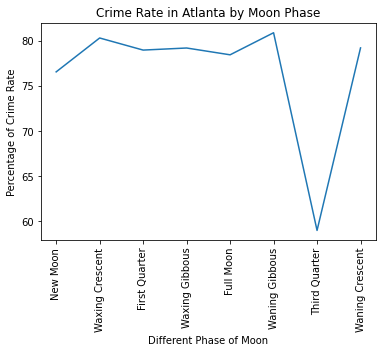

In [21]:
Moon_Crime_Sum = New_Moon_Phase_Cleaned.sum()
xaxis = New_Moon_Phase_Cleaned.columns

phase_list
phase = 0
yaxis = []

for x in Moon_Crime_Sum:
    yaxis.append(x/phase_list[phase])
    phase = phase + 1


plt.plot(xaxis, yaxis)
plt.xlabel('Different Phase of Moon')
plt.xticks(rotation="vertical")
plt.ylabel('Percentage of Crime Rate')
plt.title('Crime Rate in Atlanta by Moon Phase')
plt.savefig("MoonPhease.png",
            bbox_inches ="tight")
plt.show()

## Precipitation vs. Crime Rate

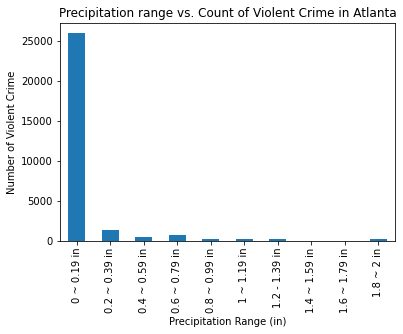

<Figure size 432x288 with 0 Axes>

In [22]:
Crime_Rain_Range = Merged_DF.groupby(["Precip_Range"]).count()['crime']
Rain_chart = Crime_Rain_Range.plot(kind = 'bar')
Rain_chart.set_xlabel('Precipitation Range (in)')
Rain_chart.set_ylabel('Number of Violent Crime')
Rain_chart.set_title('Precipitation range vs. Count of Violent Crime in Atlanta')
plt.savefig("Precipitation and Crime.png",
            bbox_inches ="tight")
plt.show()
plt.tight_layout()

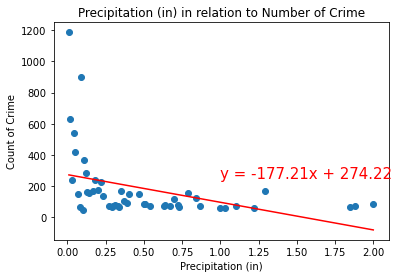

R value is 0.16035897649963357.
The correlation coefficient between precipitation and crime rate is -0.4


In [23]:
Removed_Rain = Merged_DF.loc[Merged_DF['precip'] != 0,:]

Rain_2 = Removed_Rain.groupby(['precip']).count()['crime']



xAxis_rain = Removed_Rain['precip'].unique()
output_rain = sorted(xAxis_rain, key = float)
rain_array = np.array(output_rain, dtype=np.float64)

plt.scatter(rain_array, Rain_2)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(rain_array, Rain_2)
crime_rain_fit = (slope * rain_array) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(rain_array, crime_rain_fit, "r-")
plt.annotate(line_eq,(1, 250),fontsize=15,color="red")
plt.xlabel('Precipitation (in)')
plt.ylabel('Count of Crime')
plt.title('Precipitation (in) in relation to Number of Crime')
plt.savefig("Precipitation adn Crime 2.png",
            bbox_inches ="tight")
plt.show()

print(f"R value is {rvalue**2}.")
print(f"The correlation coefficient between precipitation and crime rate is {round(st.pearsonr(rain_array, Rain_2)[0],2)}")

## Neighborhood vs. Crime Rate (Midtown, Downtown, West End, Old Fourth Ward, Vine City)


In [24]:
# Neighbor_DF = Merged_DF.loc[Merged_DF['neighborhood'].isin(['Downtown','Midtown','Old Fourth Ward','West End','Vine City'])]
# Cleaned_Neighbor = Neighbor_DF.groupby(['neighborhood', 'Temp Range'])
# More_Cleaned_Neighbor = Cleaned_Neighbor['crime'].count()
# print(More_Cleaned_Neighbor)

In [25]:
# Neighbor_chart = More_Cleaned_Neighbor.plot(kind = "bar")
# plt.show()

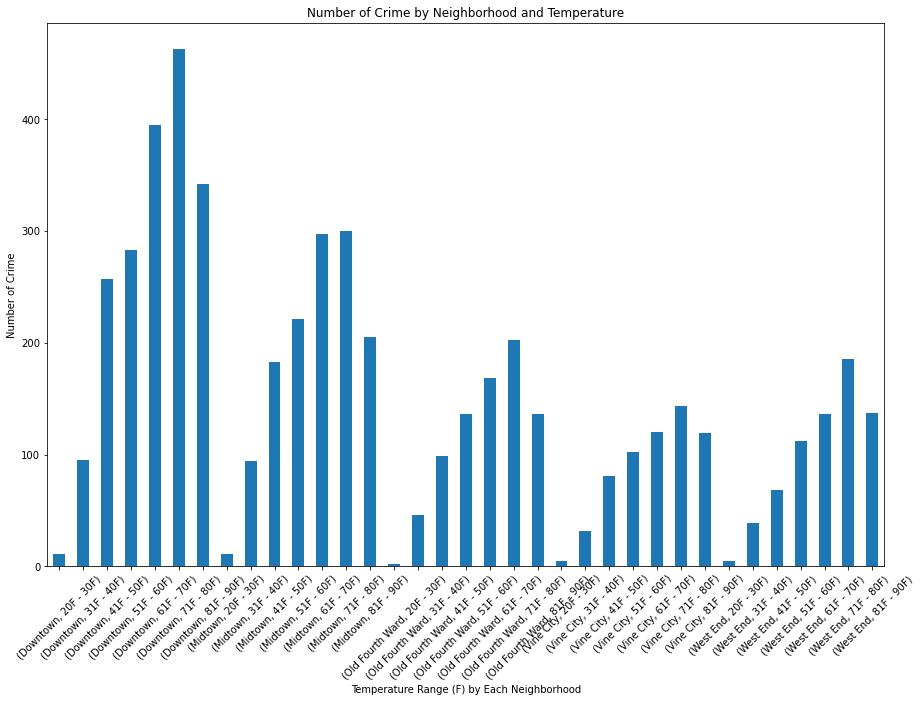

In [26]:
More_Cleaned_Neighbor.plot.bar(x='temp range', y='count', rot=45, figsize=(15, 10))
plt.title("Number of Crime by Neighborhood and Temperature")
plt.xlabel("Temperature Range (F) by Each Neighborhood")
plt.ylabel("Number of Crime")
plt.savefig("Neighborhood_Crime.png",
            bbox_inches ="tight")

In [38]:
bad_weather = Merged_DF.loc[(Merged_DF['temp'] < 50) | (Merged_DF['temp'] > 80)]
bad_weather_cleaned = bad_weather.loc[bad_weather['precip'] > 0]
bad_weather_crime = bad_weather_cleaned.groupby(['crime']).count()['name']
bad_weather_crime


crime
AGG ASSAULT              208
AUTO THEFT               412
BURGLARY-NONRES          113
BURGLARY-RESIDENCE       412
HOMICIDE                  10
LARCENY-FROM VEHICLE    1015
LARCENY-NON VEHICLE      703
RAPE                      21
ROBBERY-COMMERCIAL        25
ROBBERY-PEDESTRIAN       156
ROBBERY-RESIDENCE         16
Name: name, dtype: int64

In [32]:
good_weather = Merged_DF.loc[(Merged_DF['temp'] >= 65) & (Merged_DF['precip'] == 0)]
good_weather_cleaned = good_weather.loc[good_weather['temp'] <= 75]
good_weather_crime = good_weather_cleaned.groupby(['crime']).count()['name']
good_weather_crime

crime
AGG ASSAULT              335
AUTO THEFT               533
BURGLARY-NONRES          118
BURGLARY-RESIDENCE       434
HOMICIDE                  22
LARCENY-FROM VEHICLE    1479
LARCENY-NON VEHICLE      945
RAPE                      15
ROBBERY-COMMERCIAL        19
ROBBERY-PEDESTRIAN       229
ROBBERY-RESIDENCE         19
Name: name, dtype: int64

TypeError: pie() got an unexpected keyword argument 'facecolor'

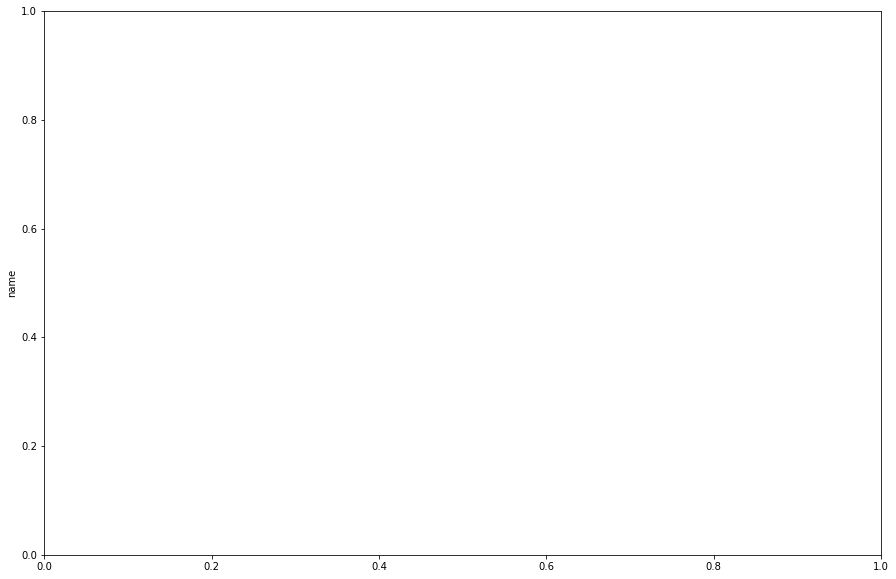

In [41]:
good_weather_crime.plot.pie(x='crime', y='count', rot=45, figsize=(15, 10), facecolor='g')
plt.ylim(0,1500)
plt.title("Number of Different Crime in Good Weather")
plt.xlabel("Different Type of Crime")
plt.ylabel("Number of Crime")
plt.savefig("Good_weather_crime.png",
            bbox_inches ="tight")
plt.show()

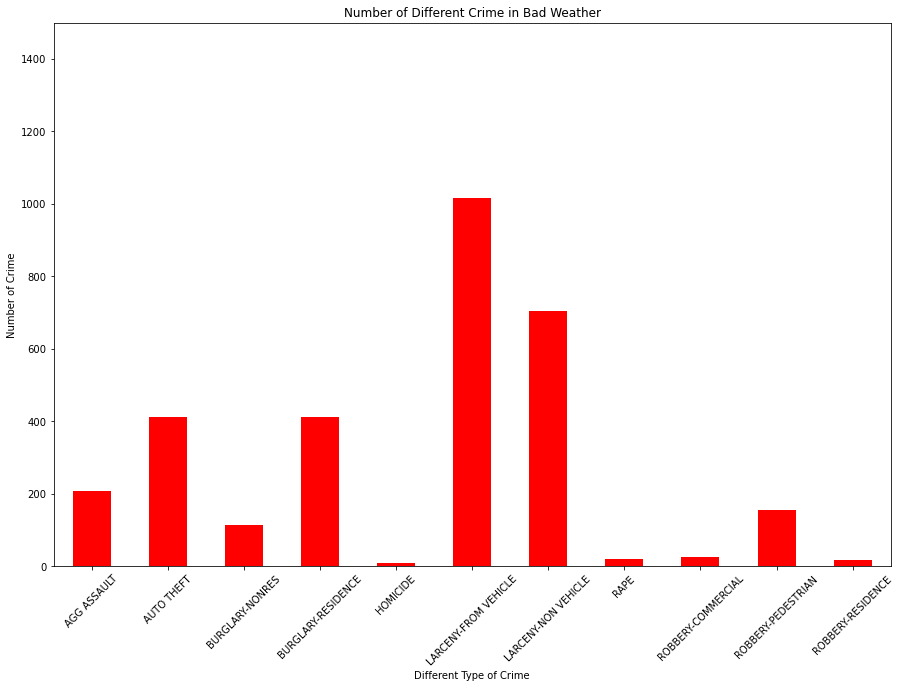

In [39]:
bad_weather_crime.plot.bar(x='crime', y='count', rot=45, figsize=(15, 10), facecolor='r')
plt.ylim(0,1500)
plt.title("Number of Different Crime in Bad Weather")
plt.xlabel("Different Type of Crime")
plt.ylabel("Number of Crime")
plt.savefig("Bad_weather_crime.png",
            bbox_inches ="tight")
plt.show()